# Librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Nettoyage des données

In [2]:
df = pd.read_csv('train.csv')
df.copy()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
#on regarde le nombre de lignes et de colonnes
print('Le nombre de ligne dans ce dataset : {}'.format(df.shape[0]))
print('Le nombre de colonne dans ce dataset dataset : {}'.format(df.shape[1]))

Le nombre de ligne dans ce dataset : 6019
Le nombre de colonne dans ce dataset dataset : 13


In [6]:
#on regarde les différentes features
print('Les features du dataset : {}'.format(df.columns.to_list()))

Les features du dataset : ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


In [7]:
#permet de voir les différents types des différentes colonnes.
#permet de remarquer que certaines colonnes ont des valeurs nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
#on regarde le nombre de valeurs nulles dans chacune des colonnes
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
#on récupère seulement les valeurs numériques des colonnes Mileage, Engine et Power
df.Mileage = df.Mileage.str.extract("(.*)(?=\ )").astype('float')
df.Engine = df.Engine.str.extract("(\d+)(?=\ )").astype('float')
df.Power = df.Power.str.extract("(\d+.\d*)").astype('float')

In [10]:
print(df.Mileage.dtype)
print(df.Engine.dtype)
print(df.Power.dtype)

float64
float64
float64


In [11]:
#étant donné le nombre de valeurs nulles dans la colonne New Price, on peut l'enlever du dataset
df.drop(['New_Price'], axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


# Exploration des données 

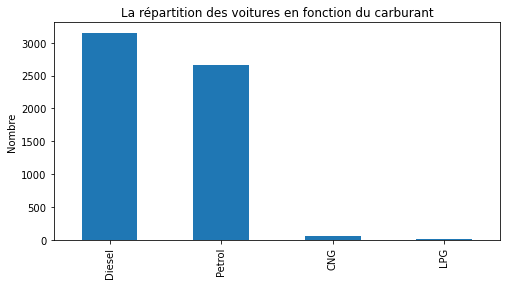

In [15]:
#on regarde le nombre de véhicules en fonction du type de carburant
plt.figure(figsize=(8, 4))
plt.ylabel('Nombre')
plt.title('La répartition des voitures en fonction du carburant')
df.Fuel_Type.value_counts().plot.bar()
plt.show()

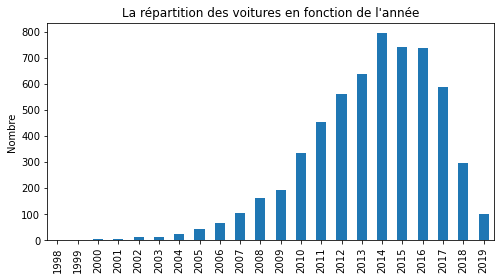

In [16]:
#on regarde le nombre de véhicules en fonction du type de carburant
plt.figure(figsize=(8, 4))
plt.ylabel('Nombre')
plt.title("La répartition des voitures en fonction de l'année")
df.Year.value_counts().sort_index().plot.bar()

plt.show()

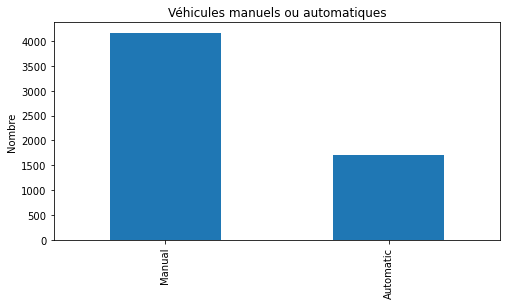

In [17]:
#véhicules manuels ou automatiques
plt.figure(figsize=(8, 4))
plt.ylabel('Nombre')
plt.title('Véhicules manuels ou automatiques')
df.Transmission.value_counts().plot.bar()
plt.show()

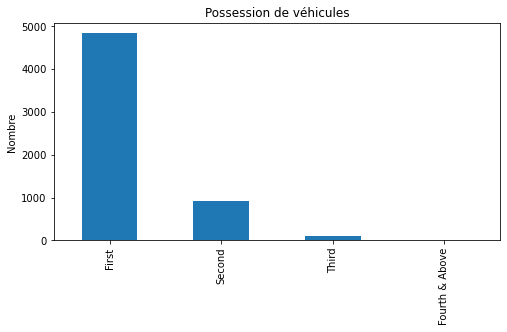

In [18]:
#possession de véhicules
#il y a beaucoup de véhicules qui sont à leur premier chauffeur
plt.figure(figsize=(8, 4))
plt.ylabel('Nombre')
plt.title('Possession de véhicules')
df.Owner_Type.value_counts().plot.bar()
plt.show()

<AxesSubplot:>

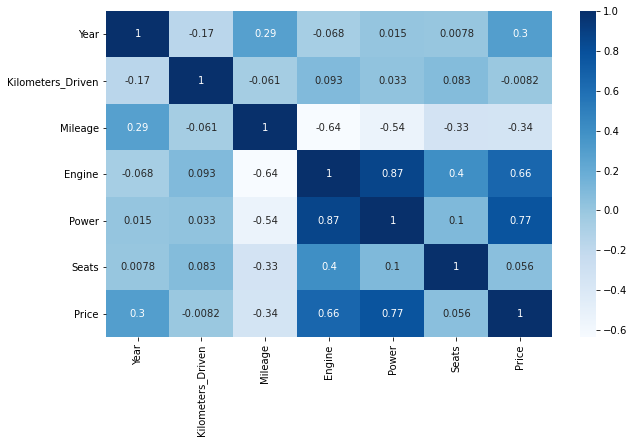

In [19]:
#corrélation des features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
#on peut remarquer que la corrélation avec les prix et "Engine" puis "Power" est assez élevée
#ce qui veut dire que plus les centimètres cubes du moteur sont élevés, plus le prix le sera aussi, et plus la puissance
#du véhicule est élevée, plus le prix l'est aussi.
#on peut voir que l'année de sortie de la voiture a une assez bonne corrélation avec le prix, dans le sens où
#plus le véhicule est récent, plus il aura tendance à valoir cher

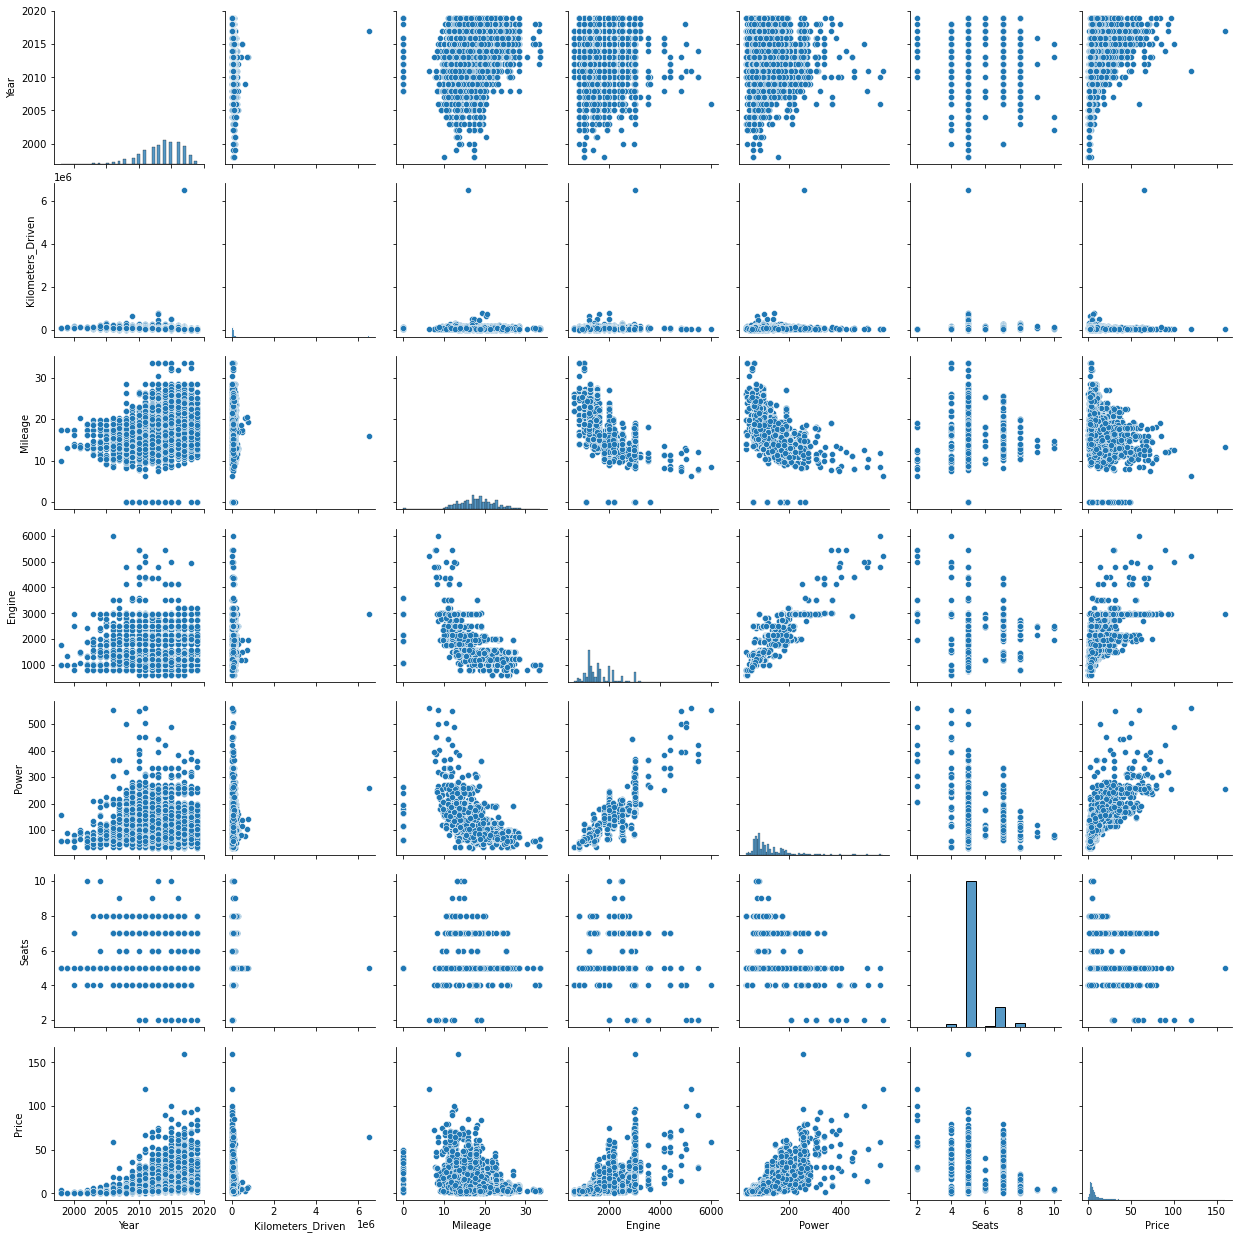

In [20]:
#grâce à l'ensemble des graphiques correspondants à la matrice de confusion, on peut voir qu'il y a plusieurs 
#valeurs abérrantes dans les features qui nous intéressent
sns.pairplot(data=df)

In [21]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

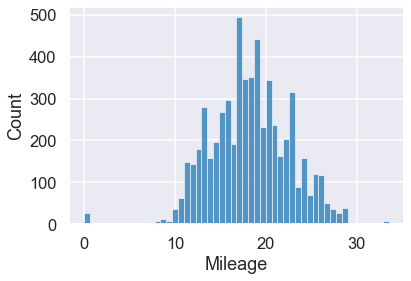

In [22]:
#le minimum pour les kilomètres étant à 0, ce qui est quasiment impossible
sns.set_context('talk')
sns.set_style('darkgrid')
sns.histplot(df.Mileage)

In [23]:
#on remarque qu'il y a des outliers, une voiture qui a roulé 85000km ne peut pas avoir 0 km/l
df.loc[df['Mileage'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,35.67
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,38.99
707,Mercedes-Benz M-Class ML 350 4Matic,Pune,2014,120000,Diesel,Automatic,First,0.0,2987.0,165.00,5.0,30.00
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,39.50
996,Hyundai Santro Xing GL,Pune,2008,93000,Petrol,Manual,First,0.0,1086.0,62.00,5.0,1.45
1059,Hyundai Santro Xing GL,Hyderabad,2010,58163,Petrol,Manual,First,0.0,1086.0,62.00,5.0,2.45
1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,11.00
1308,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,2014,33000,Diesel,Automatic,Second,0.0,2987.0,165.00,5.0,43.00
1354,Hyundai Santro Xing GL,Kochi,2011,20842,Petrol,Manual,First,0.0,1086.0,62.00,5.0,2.78


In [24]:
#il y a 28 lignes ayant 0 dans Mileage
df[df.Mileage == 0].shape[0]

28

In [25]:
#on enlève les points d'entraînements pour les valeurs de Mileage qui sont égales à 0
df = df[~(df.Mileage == 0)]

<AxesSubplot:title={'center':'La relation entre Year et Price'}, xlabel='Year', ylabel='Price'>

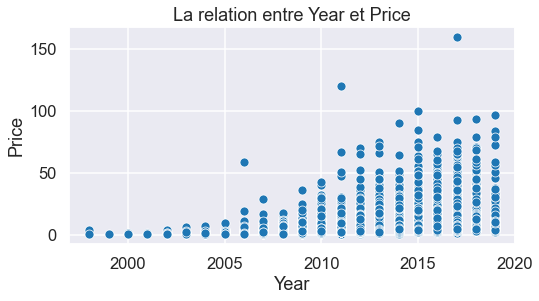

In [26]:
#relation entre "Year" et "Price"
sns.set_context('talk')
sns.set_style('darkgrid')
plt.figure(figsize=(8, 4))
plt.title('La relation entre Year et Price')
sns.scatterplot(x=df.Year, y=df.Price, data=df)

In [27]:
#on remarque que dans le graphique ci-dessus, il y a 3 valeurs aberrantes, que l'on peut enlever
df[(df['Year'] == 2006) & (df.Price > 40)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.6,5998.0,552.0,4.0,59.0


In [28]:
df[(df['Year'] == 2011) & (df.Price > 100)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.0


In [29]:
df[(df['Year'] == 2017) & (df.Price > 140)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0


In [30]:
df = df[~((df['Year'] == 2006) & (df.Price > 40))]
df = df[~((df['Year'] == 2011) & (df.Price > 100))]
df = df[~((df['Year'] == 2017) & (df.Price > 140))]

<AxesSubplot:title={'center':'Relation entre Year et Price'}, xlabel='Year', ylabel='Price'>

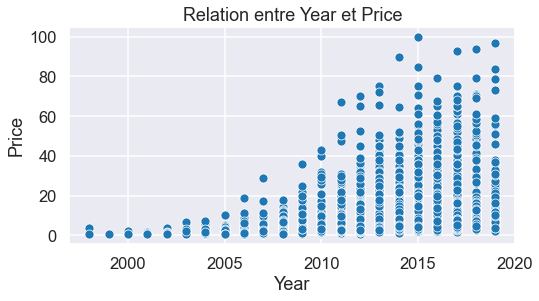

In [31]:
#on vérifie que les valeurs ont bien été enlevées
plt.figure(figsize=(8, 4))
plt.title('Relation entre Year et Price')
sns.scatterplot(x=df.Year, y=df.Price, data=df)

<AxesSubplot:title={'center':'Relation entre Price et KM parcourus'}, xlabel='Kilometers_Driven', ylabel='Price'>

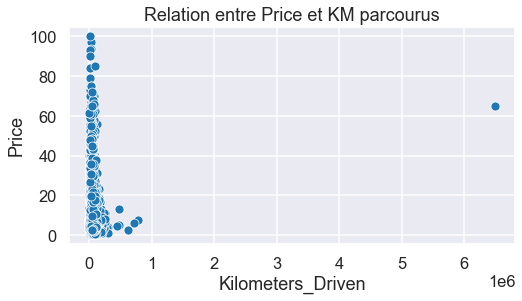

In [32]:
#on s'intéresse maintenant à la valeur abérrante entre le prix et les km parcourus
plt.figure(figsize=(8, 4))
plt.title('Relation entre Price et KM parcourus')
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price,data=df)

In [33]:
#la valeur abérrante ici, nous montre que le véhicule a été conduit sur plus de 6,5 millions de KM, on la supprime donc
df[df.Kilometers_Driven > 1000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


In [34]:
df = df[~(df.Kilometers_Driven > 1000000)]

<AxesSubplot:title={'center':'Relation entre Price et KM parcourus'}, xlabel='Kilometers_Driven', ylabel='Price'>

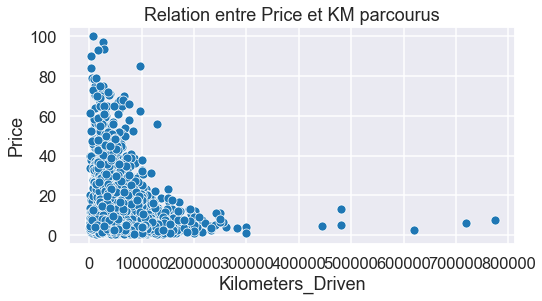

In [35]:
#on s'aperçoit maintenant que même en ayant enlevé la valeur extrême, d'autres se sont démarquées, on doit les enlever aussi
plt.figure(figsize=(8, 4))
plt.title('Relation entre Price et KM parcourus')
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price,data=df)

In [36]:
df[df.Kilometers_Driven > 400000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,7.50
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,2.70
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.90
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,4.45


In [37]:
df = df[~(df.Kilometers_Driven > 400000)]

<AxesSubplot:title={'center':'Relation entre Price et KM parcourus'}, xlabel='Kilometers_Driven', ylabel='Price'>

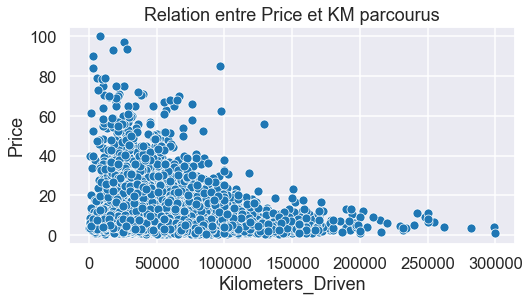

In [38]:
#malheureusement d'autres valeurs abérrantes sont apparues, on doit les enlever encore une fois
plt.figure(figsize=(8, 4))
plt.title('Relation entre Price et KM parcourus')
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price,data=df)

In [39]:
df[(df.Kilometers_Driven > 90000) & (df.Price > 80)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993.0,308.43,5.0,85.0


In [40]:
df[(df.Kilometers_Driven > 100000) & (df.Price > 40)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0,2987.0,258.0,7.0,56.0


In [41]:
df[(df.Kilometers_Driven > 90000) & (df.Price > 40)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97430,Diesel,Automatic,First,14.75,2967.0,245.00,7.0,62.67
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.00,2987.0,258.00,7.0,56.00
5535,BMW X6 xDrive 40d M Sport,Ahmedabad,2015,97003,Diesel,Automatic,First,15.87,2993.0,308.43,5.0,85.00


In [42]:
df = df[~((df.Kilometers_Driven > 90000) & (df.Price > 80))]
df = df[~((df.Kilometers_Driven > 100000) & (df.Price > 60))]
df = df[~((df.Kilometers_Driven > 90000) & (df.Price > 40))]

<AxesSubplot:title={'center':'Relation entre Price et KM parcourus'}, xlabel='Kilometers_Driven', ylabel='Price'>

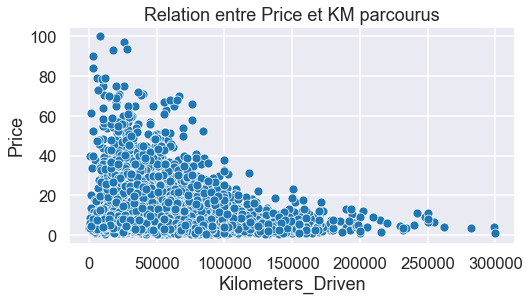

In [43]:
#on vérifie une dernière fois, voir si d'autres valeurs abérrantes se sont créées
plt.figure(figsize=(8, 4))
plt.title('Relation entre Price et KM parcourus')
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price,data=df)

<AxesSubplot:title={'center':'Relation entre Price et KM parcourus'}, xlabel='Kilometers_Driven', ylabel='Price'>

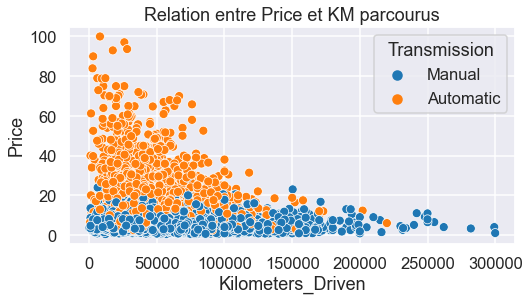

In [44]:
#toujours entre prix et km parcourus, on démarque maintenant les voitures manuelles des voitures autos
#on remarque que les voitures automatiques sont biens plus chères que les autres, qu'elles ont moins de km parcourus
#et que plus le kilomètrage est élevé, plus le prix baisse
plt.figure(figsize=(8, 4))
plt.title('Relation entre Price et KM parcourus')
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price,data=df, hue='Transmission')

<AxesSubplot:title={'center':'Relation entre Mileage et Price'}, xlabel='Mileage', ylabel='Price'>

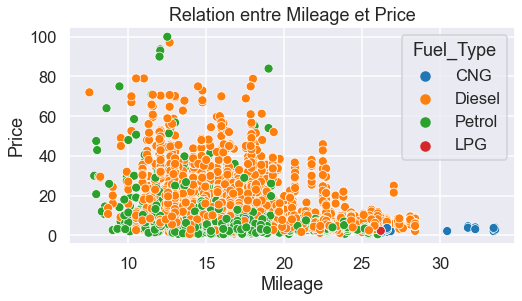

In [45]:
#on s'intéresse maintenant à Mileage et Price
#on remarque quelques données qui se séparent du reste, on va les enlever
#la majorité des véhicules font entre 10 et 25 KM/L
#les diesels sont en grande partie plus chères que les essences
plt.figure(figsize=(8, 4))
plt.title('Relation entre Mileage et Price')
sns.scatterplot(x=df.Mileage, y=df.Price,data=df, hue='Fuel_Type')

In [46]:
#valeurs abérrantes
df[df.Price > 80]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,97.07
1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,93.67
1984,BMW 7 Series 740Li,Bangalore,2017,17465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,93.00
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,83.96
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.00,2.0,90.00
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.10,2.0,100.00


In [47]:
df[df.Mileage > 30].head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,3.50
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,2.96
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,3.05


In [48]:
#on enlève ces valeurs
df = df[~(df.Price > 80)]
df = df[~(df.Mileage > 30)]

<AxesSubplot:title={'center':'Relation entre Mileage et Price'}, xlabel='Mileage', ylabel='Price'>

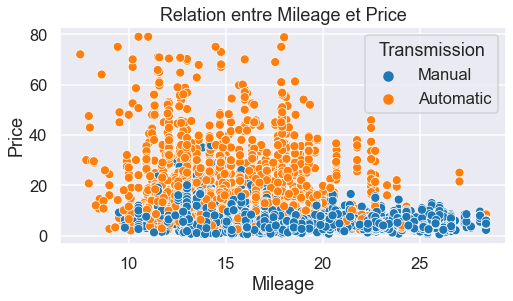

In [49]:
#on vérifie, et en ajoutant le type de véhicule
#encore une fois on remarque que les automatiques ont tendance à valoir plus chères que les manuelles
plt.figure(figsize=(8, 4))
plt.title('Relation entre Mileage et Price')
sns.scatterplot(x=df.Mileage, y=df.Price,data=df, hue='Transmission')

<AxesSubplot:title={'center':'Relation entre Engin et Price'}, xlabel='Engine', ylabel='Price'>

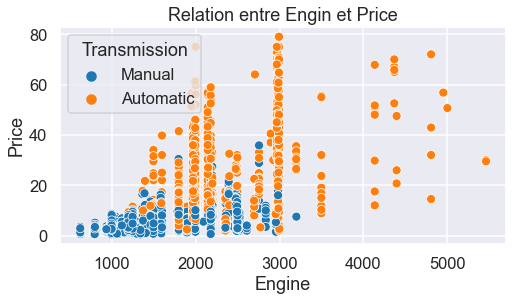

In [50]:
#on établie une relation entre Engine et Price en associant encore une fois le type des véhicules
#on voit que plus la cylindrée de la voiture est élevée, plus le prix augmente
#une fois de plus, on voit que les voitures automatiques sont elles aussi plus chères, et globalement plus cylindrées
plt.figure(figsize=(8, 4))
plt.title('Relation entre Engin et Price')
sns.scatterplot(x=df.Engine, y=df.Price,data=df, hue='Transmission')

In [51]:
#on regarde les valeurs qui se démarquent un peu trop des autres, puis on les enlève
df[df.Engine > 4000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,14.50
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.00
459,Audi Q7 4.2 TDI Quattro Technology,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,48.91
586,Audi Q7 4.2 TDI Quattro Technology,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,29.77
1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,67.00
1093,Audi Q7 4.2 TDI Quattro Technology,Bangalore,2014,50000,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,51.00
1352,Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel,Bangalore,2012,66538,Diesel,Automatic,First,10.20,4367.0,308.0,7.0,70.00
1596,Audi Q7 4.2 FSI quattro,Delhi,2008,71000,Petrol,Automatic,First,8.30,4134.0,250.0,7.0,11.99
2100,Porsche Cayenne Turbo S,Mumbai,2010,35000,Petrol,Automatic,Second,11.90,4806.0,550.0,5.0,32.00
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00,4806.0,394.3,4.0,42.91


In [52]:
df = df[~(df.Engine > 4000)]

<AxesSubplot:title={'center':'Relation entre Engin et Price'}, xlabel='Engine', ylabel='Price'>

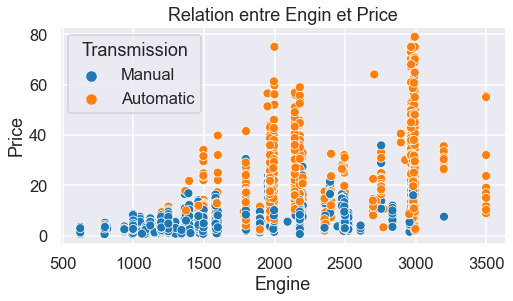

In [53]:
#on établie une relation entre Engine et Price en associant encore une fois le type des véhicules
#on voit que plus la cylindrée de la voiture est élevée, plus le prix augmente
#une fois de plus, on voit que les voitures automatiques sont elles aussi plus chères, et globalement plus cylindrées
plt.figure(figsize=(8, 4))
plt.title('Relation entre Engin et Price')
sns.scatterplot(x=df.Engine, y=df.Price,data=df, hue='Transmission')

<AxesSubplot:title={'center':'Relation entre Power et Price'}, xlabel='Power', ylabel='Price'>

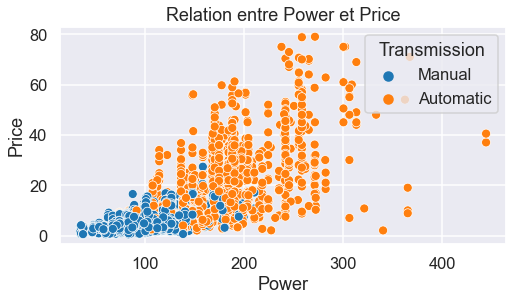

In [54]:
#on établie la relation entre la puissance et le prix, en ajoutant encore une fois le type de véhicule
#on remarque l'influence de la puissance du moteur sur le prix, plus on augmente cette puissance, plus le prix grandi
#les voitures automatiques sont toujours plus chères que les voitures manuelles
plt.figure(figsize=(8, 4))
plt.title('Relation entre Power et Price')
sns.scatterplot(x=df.Power, y=df.Price,data=df, hue='Transmission')

In [55]:
#on identifie et supprime les valeurs trop éloignées des autres
df[df.Power > 290]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.00
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,37.00
326,BMW 6 Series 640d Gran Coupe,Mumbai,2011,30000,Diesel,Automatic,First,9.52,2993.0,313.00,4.0,49.00
418,Mercedes-Benz GLC 43 AMG Coupe,Coimbatore,2018,22397,Petrol,Automatic,First,11.50,2996.0,367.00,5.0,70.99
589,Mercedes-Benz S Class 2005 2013 S 350 L,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.90,5.0,19.00
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.54
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.00
1123,BMW 7 Series 2007-2012 740Li,Pune,2008,66000,Petrol,Automatic,Second,8.45,2979.0,321.00,5.0,10.75
1741,BMW X6 xDrive 40d,Hyderabad,2013,58000,Diesel,Automatic,First,11.20,2993.0,306.00,4.0,48.00
1930,Mercedes-Benz S Class 2005 2013 S 350 L,Mumbai,2007,55000,Petrol,Automatic,Third,10.13,3498.0,364.90,5.0,9.99


In [56]:
df = df[~(df.Power > 290)]

<AxesSubplot:title={'center':'Relation entre Power et Price'}, xlabel='Power', ylabel='Price'>

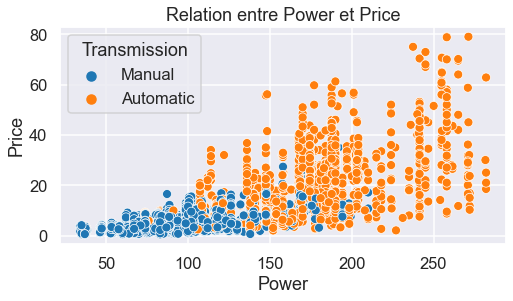

In [57]:
#on établie la relation entre la puissance et le prix, en ajoutant encore une fois le type de véhicule
#on remarque l'influence de la puissance du moteur sur le prix, plus on augmente cette puissance, plus le prix grandi
#les voitures automatiques sont toujours plus chères que les voitures manuelles
plt.figure(figsize=(8, 4))
plt.title('Relation entre Power et Price')
sns.scatterplot(x=df.Power, y=df.Price,data=df, hue='Transmission')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5759 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5759 non-null   object 
 1   Location           5759 non-null   object 
 2   Year               5759 non-null   int64  
 3   Kilometers_Driven  5759 non-null   int64  
 4   Fuel_Type          5759 non-null   object 
 5   Transmission       5759 non-null   object 
 6   Owner_Type         5759 non-null   object 
 7   Mileage            5759 non-null   float64
 8   Engine             5759 non-null   float64
 9   Power              5759 non-null   float64
 10  Seats              5759 non-null   float64
 11  Price              5759 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 584.9+ KB


In [59]:
qsdqsd

NameError: name 'qsdqsd' is not defined

In [60]:
models = df.Name.str.extract(pat=r'(\w+) (\w+)', expand=False)
models.head()

,0,1
0,Maruti,Wagon
1,Hyundai,Creta
2,Honda,Jazz
3,Maruti,Ertiga
4,Audi,A4


In [61]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [62]:
from pandas import DataFrame
DataFrame(models[0])
df.Name = models[0].str.casefold()

<AxesSubplot:title={'center':'Relation entre Price et Name'}, xlabel='Name', ylabel='Price'>

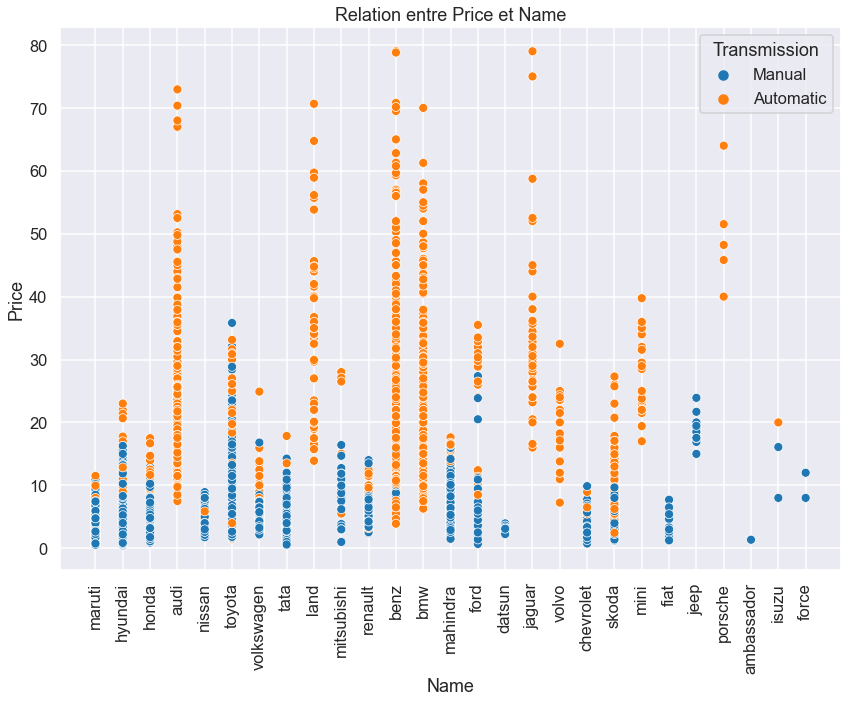

In [63]:
plt.figure(figsize=(14, 10))
plt.title('Relation entre Price et Name')
plt.xticks(rotation=90)
sns.scatterplot(x=df.Name, y=df.Price,data=df,hue='Transmission')

In [ ]:
sdfsdf

In [ ]:
models_prices=[]
couple=[]
i=0
for model in models.str.casefold():
    couple=couple + [model]
    couple=couple + [df.query(f"Name == '{model}'").Price.max()]
    models_prices = [couple] + models_prices
    couple=[]
    i+=1
models_prices

In [ ]:
qsdqsd

# Feature Engineering

In [ ]:
#on ajoute une feature regroupant les km parcourus et les années, en km parcourus par an
#df['Kilometers_Driven_Per_Year'] = df['Kilometers_Driven'] / df['Year']

In [ ]:
#on récupères dans une variable les colonnes qui n'ont pas des valeurs numériques
cat = df.dtypes == 'object'
categorical_cols = df.columns[cat].to_list()
categorical_cols

In [ ]:
dummies = pd.get_dummies(categorical_cols, drop_first=True)

In [ ]:
#on s'occupe de la variable name
df.Name

In [ ]:
#on regarde les véhicules qui ont un nom unique et on décide de regrouper les voitures qui ont quasiment le même nom
df.Name.nunique()

In [ ]:
df

In [ ]:
df.Name = models[0] + ' ' + models[1]

In [ ]:
models[0].str.casefold().value_counts().sort_values(ascending=False)

In [ ]:
dftest = df.loc[df['Name']=='maruti'].loc[df['Year']==2014].loc[df['Fuel_Type']=='Diesel'].loc[df['Transmission']=="Manual"]
dftest

In [ ]:
df.loc[df['Price']==df['Price'].max()]

In [ ]:
plt.figure(figsize=(18, 14))
plt.title('Relation entre Power et Price')
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price,data=df, hue='Name')

In [ ]:
df.loc[df['Name']=="maruti"]

In [ ]:
models = models[0].str.casefold().drop_duplicates()

In [ ]:
df.Seats.value_counts()

In [ ]:
#on a bien diminué le nom de modèle de voiture unique
df.Name.nunique()

In [ ]:
#on regarde combien de voitures contiennent chaque modèle
df.Name.value_counts().sort_values(ascending=False)

In [ ]:
#models_less_than_10 = df.Name.value_counts()[df.Name.value_counts().values < 10].index.to_list()
#models_less_than_10[:5]

In [ ]:
#df.Name = df.Name.apply(lambda x: 'other' if x in models_less_than_10 else x)

# Categorical et Ordinal Encoding

In [ ]:
categorical_features = df.select_dtypes(include = ["object"]).columns.to_list()
numerical_features = df.select_dtypes(exclude = ["object"]).columns.to_list()
numerical_features.remove('Price')

In [ ]:
print('Les features catégorielles sont ' + str(categorical_features))
print('Les features numériques sauf le prix sont ' + str(numerical_features))

In [ ]:
#Owner_type est une feature contenant des variables ordinales, on les encode donc grâce à OrdinalEncoder
df.Owner_Type.unique()

In [ ]:
#maintenant que l'on a recrée une colonne contenant les bonnes valeurs numériques correspondants aux valeurs ordinales
#de l'ancienne colonne, on peut supprimer cetter dernière
enc = OrdinalEncoder(categories=[['First', 'Second', 'Third', 'Fourth & Above']])
Owner_Type_transformed = enc.fit_transform(df.loc[:, ['Owner_Type']])

df['Owner_Type_Numerical'] = Owner_Type_transformed
df.Owner_Type_Numerical = df.Owner_Type_Numerical.astype('int')

In [ ]:
df.drop(['Owner_Type'], axis=1, inplace=True)
categorical_features.remove('Owner_Type')

In [ ]:
le = preprocessing.LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Location'] = le.fit_transform(df['Location'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

#df['Kilometers_Driven_Per_Year'] = df['Kilometers_Driven'] / df['Year']

In [ ]:
df.head(3)

In [ ]:
#il ne reste plus de valeurs catégorielles
categorical_features = df.select_dtypes(include = ["object"]).columns.to_list()
numerical_features = df.select_dtypes(exclude = ["object"]).columns.to_list()
numerical_features.remove('Price')
categorical_features

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dfnum)

print(df)

print(scaled_df)

In [ ]:
for cat_feat in categorical_features:
    dummies = pd.get_dummies(df[cat_feat])
    dummies.drop(columns=dummies.iloc[:,-1:].columns, axis=1, inplace=True)
  # # # to eliminate dummy variable trap
    df = pd.concat([df, dummies], axis=1).drop([cat_feat], axis=1)

# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
X = df.drop(['Price'], axis=1)
y = df.Price
model = ExtraTreesRegressor()
model.fit(X,y)

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

# Modèles

In [ ]:
# creating X and y
X = df.drop(['Price','Seats'], axis=1)
y = df.Price

In [ ]:
# training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

In [ ]:
#Random Forest Regressor
from sklearn.ensemble imp*ort RandomForestRegressor
from sklearn import metrics


regressor=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_features='sqrt', max_depth=80, bootstrap=True)
regressor.fit(X_train,y_train)
y_pred_randf=regressor.predict(X_test)

mae_r = metrics.mean_absolute_error(y_test,y_pred_randf)
print('MAE = {}'.format(mae_r/y.mean()))

rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_randf))
print('RMSE = {}'.format(rmse_r/y.mean()))

print("Random Forest = ", regressor.score(X_test, y_test))


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor(max_depth=4)
regr.fit(X_train,y_train)
y_pred_dectree=regr.predict(X_test)

mae_r = metrics.mean_absolute_error(y_test,y_pred_dectree)
print('MAE = {}'.format(mae_r/y.mean()))

rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_dectree))
print('RMSE = {}'.format(rmse_r/y.mean()))

r2_dectree = regressor.score(X_test, y_test)

print("Decision Tree", regr.score(X_test, y_test))


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regr=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=291)
regr.fit(X_train,y_train)
y_pred_adaboost=regr.predict(X_test)

mae_r = metrics.mean_absolute_error(y_test,y_pred_adaboost)
print('MAE = {}'.format(mae_r/y.mean()))

rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_adaboost))
print('RMSE = {}'.format(rmse_r/y.mean()))

r2_ada = regr.score(X_test, y_test)

print("ADABoost Regressor", r2_ada)

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=50)
rr.fit(X_train,y_train)
y_pred_ridge=rr.predict(X_test)

mae_r = metrics.mean_absolute_error(y_test,y_pred_ridge)
print('MAE = {}'.format(mae_r/y.mean()))


rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('RMSE = {}'.format(rmse_r/y.mean()))

r2_ridge = rr.score(X_test, y_test)

print("Ridge Regression", rr.score(X_test, y_test))

In [ ]:
X = df.drop(['Price'], axis=1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

In [ ]:
# modèle de regression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

In [ ]:
df.info()

In [ ]:
from sklearn.metrics import r2_score
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE = {}'.format(rmse_lr/y.mean()))
r2_lr = r2_score(y_test, prediction)
print('R-squared = {}'.format(r2_lr))

In [ ]:
# creating X and y
X = df.drop(['Price'], axis=1)
y = df.Price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [ ]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=6542, depth=3, learning_rate=0.03)
y_pred_cb = model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)
print(model.score(X, y)) 

In [ ]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

X = df.drop(['Price'], axis=1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

# Pipeline modèle

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df.drop(['Price','Seats'], axis=1)
y = df.Price
pipe1 = Pipeline([('std', StandardScaler()), ('decision_tree', DecisionTreeRegressor())], verbose = True)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)
pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
r2 = pipe1.score(X_test,y_test)


mae = metrics.mean_absolute_error(y_test,y_pred)
print('MAE : {}'.format(mae/y.mean()))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : {}'.format(rmse/y.mean()))


print('MSE : ',mse)
print('R² : ',r2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X = df.drop(['Price','Location','Owner_Type_Numerical'], axis=1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

pipe2 = Pipeline([('std', StandardScaler()), ('random_forest', RandomForestRegressor())], verbose = True)
pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
r2 = pipe2.score(X_test,y_test)


mae = metrics.mean_absolute_error(y_test,y_pred)
print('MAE : {}'.format(mae/y.mean()))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : {}'.format(rmse/y.mean()))


print('MSE : ',mse)
print('R² : ',r2)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

X = df.drop(['Price','Seats'], axis=1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

pipe3 = Pipeline([('std', StandardScaler()), ('ada', AdaBoostRegressor())], verbose = True)
pipe3.fit(X_train, y_train)

y_pred = pipe3.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
r2 = pipe3.score(X_test,y_test)


mae = metrics.mean_absolute_error(y_test,y_pred)
print('MAE : {}'.format(mae/y.mean()))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : {}'.format(rmse/y.mean()))


print('MSE : ',mse)
print('R² : ',r2)

In [ ]:
from sklearn.linear_model import Ridge

X = df.drop(['Price','Seats'], axis=1)
y = df.Price
pipe4 = Pipeline([('std', StandardScaler()), ('ada', Ridge())], verbose = True)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)
pipe4.fit(X_train, y_train)

y_pred_rr = pipe4.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rr) 
r2 = pipe4.score(X_test,y_test)


mae = metrics.mean_absolute_error(y_test,y_pred_rr)
print('MAE : {}'.format(mae/y.mean()))


rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
print('RMSE : {}'.format(rmse/y.mean()))


print('MSE : ',mse)
print('R² : ',r2)


In [ ]:
from sklearn import svm

X = df.drop(['Price','Seats'], axis=1)
y = df.Price
pipe5 = Pipeline([('std', StandardScaler()), ('svr', svm.SVR())], verbose = True)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)
pipe5.fit(X_train, y_train)

y_pred = pipe5.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = pipe5.score(X_test,y_test)


mae = metrics.mean_absolute_error(y_test,y_pred)
print('MAE : {}'.format(mae/y.mean()))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : {}'.format(rmse/y.mean()))


print('MSE : ',mse)
print('R² : ',r2)


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X = df.drop(['Price','Seats'], axis=1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=10)

pipe = Pipeline([('std', StandardScaler()),('CB', CatBoostRegressor())], verbose = True)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
r2 = pipe.score(X_test,y_test)


mae = metrics.mean_absolute_error(y_test,y_pred)
print('MAE : {}'.format(mae/y.mean()))


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : {}'.format(rmse/y.mean()))


print('MSE : ',mse)
print('R² : ',r2)

#MAE : 0.12853396801684708
#RMSE : 0.26614142277464425
#MSE :  5.822882020964223
#R² :  0.9408861166483611

In [ ]:
df